                     BOROUGH
VEHICLE TYPE CODE 1         
BICYCLE                 9580
COMM VEH               34960
CONSTRUCTION VEH         414
DELV VEH               29768
DEPT VEH                  80
ELECTRIC VEH             269
EMERGENCY VEH           5187
MAIL VEH                 101
MOTORCYCLE              8699
OTHERS                 33911
PASSENGER VEH         736309
PICKUP                 34916
SCOOTER                  871
SEDAN                 161010
SUV                   441840
TAXI                   77635
TRUCK                  10638
UNKOWN                 25387


Text(0, 0.5, 'Number of Accidents')

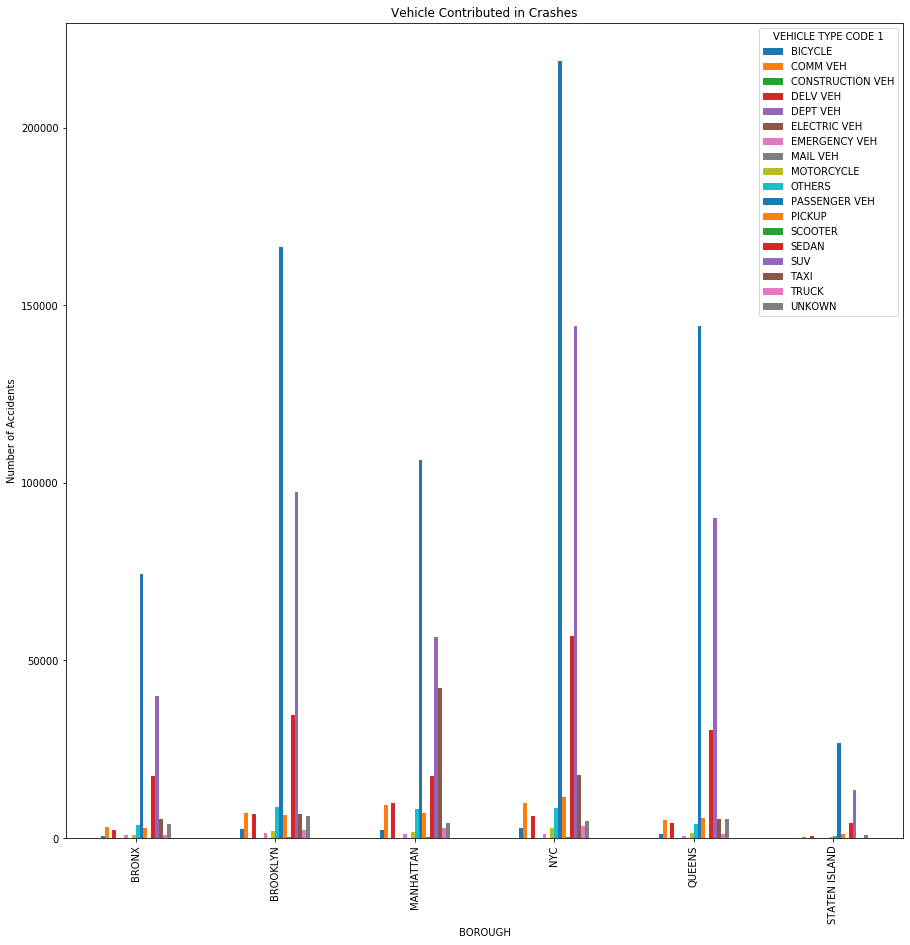

In [2]:
import requests
import pandas as pd
import numpy as np
import json
from datetime import datetime
import dateutil
from ipynb.fs.full.vehicleCategory import getCategory
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


csvfile = '/Users/loht/Downloads/Motor_Vehicle_Collisions_-_Crashes.csv'


#Convert Date into shorter format to clean data elements
def date_convert(date_to_convert):
     return datetime.strptime(date_to_convert, '%Y-%m-%dT%H:%M:%S.%f').strftime('%m/%d/%Y')

            
        
df = pd.read_csv(csvfile,low_memory=False, usecols=[ "VEHICLE TYPE CODE 1", "BOROUGH"])

# Transforming Values to Upper Case
df["VEHICLE TYPE CODE 1"] = df["VEHICLE TYPE CODE 1"].str.upper()

#If value is null then Replace with to "UNK"
df["VEHICLE TYPE CODE 1"] = df["VEHICLE TYPE CODE 1"].apply(lambda x: x if not pd.isnull(x) else 'UNK')

#If BOROUGH is unspecified or null then replace with "NYC"
df["BOROUGH"] = df["BOROUGH"].apply(lambda x: x if not pd.isnull(x) else 'NYC')

#from ipynb.fs.full.vehicleCategory import getCategory : Call Funtion from second IPYNB file 
# Reassigning dataframe with Category
df["VEHICLE TYPE CODE 1"] = getCategory(df["VEHICLE TYPE CODE 1"])



print(df.groupby(['VEHICLE TYPE CODE 1']).count())

#Generating Graph 
ax = df.groupby(['VEHICLE TYPE CODE 1','BOROUGH'])['VEHICLE TYPE CODE 1'].count().unstack(0).plot.bar(title="Vehicle Contributed in Crashes", figsize=(15,15))
ax.set_xlabel("BOROUGH")
ax.set_ylabel("Number of Accidents")


# df = pd.read_csv(csvfile,low_memory=False, usecols=["ACCIDENT DATE","ACCIDENT TIME","BOROUGH","ZIP CODE","LATITUDE","LONGITUDE",
# "ON STREET NAME","CROSS STREET NAME","OFF STREET NAME","NUMBER OF PERSONS INJURED","NUMBER OF PERSONS KILLED","NUMBER OF PEDESTRIANS INJURED",
# "NUMBER OF PEDESTRIANS KILLED","NUMBER OF CYCLIST INJURED","NUMBER OF CYCLIST KILLED","NUMBER OF MOTORIST INJURED","NUMBER OF MOTORIST KILLED",
# "CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2","COLLISION_ID","VEHICLE TYPE CODE 1","VEHICLE TYPE CODE 2"])

